In [114]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature,output_electricity_generation
0,0,Saturday,7.0,NaN,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,601.850322,974.182544
1,1,Saturday,12.0,28.0,238.153011,1604.213100,0.679706,15.241147,2903.619864,NaN,1602.318002,1144.454102,603.933579,593.915516
2,2,Friday,15.0,13.0,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,NaN,1258.098883,602.443281,884.033450
3,3,Saturday,14.0,NaN,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,588.938717,584.908719
4,4,Saturday,18.0,16.0,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,504.208816,483.609973


In [115]:
df.isna().sum()

uid                                 0
day                              5479
hour                             5613
minute                           5470
C_motion                         5517
feed_water_motion                5597
faucet_hole                      5566
vapour_pressure                  5479
vapour_enthalpy                  5437
vapour_pressure_at_division      5477
vapour_motion                    5477
feed_water_enth                  5496
vapour_temperature               5517
output_electricity_generation       0
dtype: int64

In [116]:
import numpy as np
probs = df['day'].value_counts(normalize=True)
df.loc[df['day'].isna(), 'day'] = np.random.choice(probs.index, size=df['day'].isna().sum(), p=probs.values)

In [117]:
df.drop('day', axis=1).skew()

uid                              0.000000
hour                            -0.099455
minute                           0.017874
C_motion                         3.671108
feed_water_motion               -1.052552
faucet_hole                     -1.201104
vapour_pressure                  3.732275
vapour_enthalpy                  0.873014
vapour_pressure_at_division      3.527789
vapour_motion                    3.722438
feed_water_enth                  5.227483
vapour_temperature              -2.694504
output_electricity_generation   -1.201083
dtype: float64

In [118]:
for col in ['C_motion','feed_water_motion','faucet_hole','vapour_pressure','vapour_pressure_at_division','vapour_motion','feed_water_enth','vapour_temperature']:
  df[col].fillna(df[col].median(), inplace=True)
for col in ['hour','minute','vapour_enthalpy']:
  df[col].fillna(df[col].mean(), inplace=True)

In [119]:
df.isna().sum()

uid                              0
day                              0
hour                             0
minute                           0
C_motion                         0
feed_water_motion                0
faucet_hole                      0
vapour_pressure                  0
vapour_enthalpy                  0
vapour_pressure_at_division      0
vapour_motion                    0
feed_water_enth                  0
vapour_temperature               0
output_electricity_generation    0
dtype: int64

In [120]:
df.drop('day', axis=1).skew()

uid                              0.000000
hour                            -0.105502
minute                           0.018931
C_motion                         3.759855
feed_water_motion               -1.217933
faucet_hole                     -1.373839
vapour_pressure                  3.816289
vapour_enthalpy                  0.924288
vapour_pressure_at_division      3.599497
vapour_motion                    3.804994
feed_water_enth                  5.477213
vapour_temperature              -2.913349
output_electricity_generation   -1.201083
dtype: float64

In [121]:
df = pd.get_dummies(df, columns=['day'], drop_first=True)

In [122]:
from sklearn.model_selection import train_test_split

X = df.drop('output_electricity_generation', axis=1)
y = df['output_electricity_generation']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# test_scaled = scaler.transform(test)

In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# 🔹 Train Individual Models
xgb_reg = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
lgb_reg = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
rf = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
cat_reg = CatBoostRegressor(n_estimators=300, learning_rate=0.05, depth=6, random_state=42, verbose=False)

# Fit models
xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
cat_reg.fit(X_train, y_train)

# 🔹 Get Predictions from Base Models
xgb_preds = xgb_reg.predict(X_test)
lgb_preds = lgb_reg.predict(X_test)
rf_preds = rf.predict(X_test)
cat_preds = cat_reg.predict(X_test)

# 🔹 Compute RMSE for Each Model
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_preds))
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_preds))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_preds))
rmse_cat = np.sqrt(mean_squared_error(y_test, cat_preds))

print(f"XGBoost RMSE: {rmse_xgb}")
print(f"LightGBM RMSE: {rmse_lgb}")
print(f"RandomForest RMSE: {rmse_rf}")
print(f"CatBoost RMSE: {rmse_cat}")

# 🔹 Compute Weights (Higher Weight for Lower RMSE)
rmse_list = np.array([rmse_xgb, rmse_lgb, rmse_rf, rmse_cat])
weights = 1 / rmse_list  # Inverse RMSE
weights /= weights.sum()  # Normalize to sum to 1

print(f"Model Weights: {weights}")

# 🔹 Weighted Stacking
weighted_preds = (
    weights[0] * xgb_preds +
    weights[1] * lgb_preds +
    weights[2] * rf_preds +
    weights[3] * cat_preds
)

# 🔹 Evaluate Weighted RMSE
weighted_rmse = np.sqrt(mean_squared_error(y_test, weighted_preds))
print(f"Weighted Stacking RMSE: {weighted_rmse}")

# 🔹 Train Final Meta-Model (Ridge)
stacked_preds = np.column_stack((xgb_preds, lgb_preds, rf_preds, cat_preds))
meta_model = Ridge()
meta_model.fit(stacked_preds, y_test)

# 🔹 Final Meta-Model Predictions
final_preds = meta_model.predict(stacked_preds)

# 🔹 Evaluate Final Meta-Model RMSE
meta_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
print(f"Meta-Model RMSE: {meta_rmse}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2638
[LightGBM] [Info] Number of data points in the train set: 40320, number of used features: 13
[LightGBM] [Info] Start training from score 832.300201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

KeyboardInterrupt: 

In [123]:
test = pd.read_csv("test.csv")
test

,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature
0,0,Friday,23.0,9.0,362.889183,2538.476156,0.678994,23.691700,2756.917646,25.027375,2536.898622,1273.011364,NaN
1,1,Friday,11.0,37.0,360.137575,2612.432523,0.666045,NaN,2783.082086,26.221884,2610.644658,1283.705519,601.759841
2,2,Friday,18.0,34.0,358.571643,2519.399650,0.674544,23.735582,2786.990749,25.051226,2519.766762,NaN,603.899236
3,3,NaN,12.0,26.0,NaN,2433.170459,NaN,23.443632,2821.222288,24.677265,2432.567588,1261.064125,603.034283
4,4,Friday,20.0,40.0,NaN,NaN,0.679031,23.308474,2796.995037,24.617265,2485.478112,1268.990134,605.222529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,21595,Friday,21.0,22.0,350.547735,NaN,0.677179,NaN,2792.440155,24.436078,2451.605650,1267.202949,603.417754
21596,21596,Friday,14.0,58.0,349.244673,2398.258155,0.678886,22.531962,2791.812055,23.801528,2400.723520,1256.612046,605.503277
21597,21597,Friday,23.0,5.0,357.152573,2525.896278,0.676416,23.761867,2766.226004,25.088997,NaN,1273.398714,604.848670
21598,21598,Saturday,0.0,53.0,359.203691,2490.426378,0.655879,24.169350,2754.626858,25.411994,2489.651716,1272.959188,605.145455


In [124]:
test.isna().sum()


uid                               0
day                            2358
hour                           2357
minute                         2382
C_motion                       2394
feed_water_motion              2315
faucet_hole                    2349
vapour_pressure                2452
vapour_enthalpy                2384
vapour_pressure_at_division    2326
vapour_motion                  2415
feed_water_enth                2347
vapour_temperature             2371
dtype: int64

In [125]:
test.loc[test['day'].isna(), 'day'] = np.random.choice(probs.index, size=test['day'].isna().sum(), p=probs.values)
for col in ['C_motion','feed_water_motion','faucet_hole','vapour_pressure','vapour_pressure_at_division','vapour_motion','feed_water_enth','vapour_temperature']:
  test[col].fillna(df[col].median(), inplace=True)
for col in ['hour','minute','vapour_enthalpy']:
  test[col].fillna(df[col].mean(), inplace=True)


In [126]:
test.isna().sum()

uid                            0
day                            0
hour                           0
minute                         0
C_motion                       0
feed_water_motion              0
faucet_hole                    0
vapour_pressure                0
vapour_enthalpy                0
vapour_pressure_at_division    0
vapour_motion                  0
feed_water_enth                0
vapour_temperature             0
dtype: int64

In [127]:
test = pd.get_dummies(test, columns=['day'], drop_first=True)

In [ ]:
# 🔹 Get Predictions from Base Models for Test Data
xgb_test_preds = xgb_reg.predict(test)
lgb_test_preds = lgb_reg.predict(test)
rf_test_preds = rf.predict(test)
cat_test_preds = cat_reg.predict(test)

# 🔹 Weighted Stacking for Test Data
weighted_test_preds = (
    weights[0] * xgb_test_preds +
    weights[1] * lgb_test_preds +
    weights[2] * rf_test_preds +
    weights[3] * cat_test_preds
)

# 🔹 Meta-Model Predictions for Test Data
stacked_test_preds = np.column_stack((xgb_test_preds, lgb_test_preds, rf_test_preds, cat_test_preds))
meta_test_preds = meta_model.predict(stacked_test_preds)

# 🔹 Choose the Final Test Predictions (Weighted or Meta-Model)
final_test_preds = weighted_test_preds if weighted_rmse < meta_rmse else meta_test_preds

# 🔹 Save Submission File
submission_df = pd.DataFrame({'uid': test['uid'], 'output_electricity_generation': final_test_preds})
submission_df.to_csv("submission.csv", index=False)

In [ ]:
df.columns

Index(['uid', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_pressure', 'vapour_enthalpy', 'vapour_pressure_at_division',
       'vapour_motion', 'feed_water_enth', 'vapour_temperature',
       'output_electricity_generation', 'day_Saturday'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled
scaler.transform(X_test)
# Base Random Forest Model
model=RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(root_mean_squared_error(y_pred_train,y_train))
print(root_mean_squared_error(y_pred_test,y_test))

c:\Users\khushi shetty\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


281.6260375041263
284.9521329189162


c:\Users\khushi shetty\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
# scaler= StandardScaler()
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model


# model=RandomForestRegressor()
# model.fit(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

model = grid_search.best_estimator_ 
model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model
model = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=True)
# model=RandomForestRegressor()
# model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

[0]	validation_0-rmse:168.14442
[1]	validation_0-rmse:159.82568
[2]	validation_0-rmse:151.91941
[3]	validation_0-rmse:144.41080
[4]	validation_0-rmse:137.28174
[5]	validation_0-rmse:130.50584
[6]	validation_0-rmse:124.06932
[7]	validation_0-rmse:117.95180
[8]	validation_0-rmse:112.14439
[9]	validation_0-rmse:106.62488
[10]	validation_0-rmse:101.37843
[11]	validation_0-rmse:96.39456
[12]	validation_0-rmse:91.66252
[13]	validation_0-rmse:87.17248
[14]	validation_0-rmse:82.89863
[15]	validation_0-rmse:78.82442
[16]	validation_0-rmse:74.97726
[17]	validation_0-rmse:71.31523
[18]	validation_0-rmse:67.82007
[19]	validation_0-rmse:64.50386
[20]	validation_0-rmse:61.35801
[21]	validation_0-rmse:58.36795
[22]	validation_0-rmse:55.53211
[23]	validation_0-rmse:52.83600
[24]	validation_0-rmse:50.27356
[25]	validation_0-rmse:47.84738
[26]	validation_0-rmse:45.53431
[27]	validation_0-rmse:43.33993
[28]	validation_0-rmse:41.24446
[29]	validation_0-rmse:39.27830
[30]	validation_0-rmse:37.39587
[31]	va

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer


# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = KNNImputer(n_neighbors=5)  # Fill NaNs using KNN
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Feature scaling
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model
model=RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 1.4428
Test RMSE: 2.8817


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
# scaler= StandardScaler()
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model


# model=RandomForestRegressor()
# model.fit(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

model = grid_search.best_estimator_ 
model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 1.4289
Test RMSE: 2.8938


In [ ]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
test_uid = test_df['uid']
# Handle missing values (fill numerical columns with median) 
test_df.fillna(df.median(numeric_only=True), inplace=True)  # Use median from training data
# One-hot encoding for 'day' (ensure same columns as train)
test_df = pd.get_dummies(test_df, columns=['day'], drop_first=True)
# Align columns with training data (ensure same feature set)
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value
test_df = test_df[X_train.columns]  # Reorder columns to match training data
# Scale features using the trained scaler
test_scaled = scaler.transform(test_df)
# Predict using the trained model
test_predictions_scaled = model.predict(test_scaled)
# Since we only scaled X and not y, no need to inverse transform y
submission = pd.DataFrame({'uid': test_uid, 'output_electricity_generation': test_predictions_scaled})
# Save predictions
submission.to_csv('submission_rob_modrf.csv', index=False)



In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# Load the train data
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median) 
df.fillna(df.median(numeric_only=True), inplace=True)
# One-hot encoding for categorical column 'day'
df =pd.get_dummies(df, columns=['day'], drop_first=True)
# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y= df['output_electricity_generation']
      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler= StandardScaler()

imputer = KNNImputer(n_neighbors=5)  # Fill NaNs using KNN
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model


# model=RandomForestRegressor()
# model.fit(X_train_scaled, y_train)

param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

model = grid_search.best_estimator_ 
model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 1.8562
Test RMSE: 2.9989


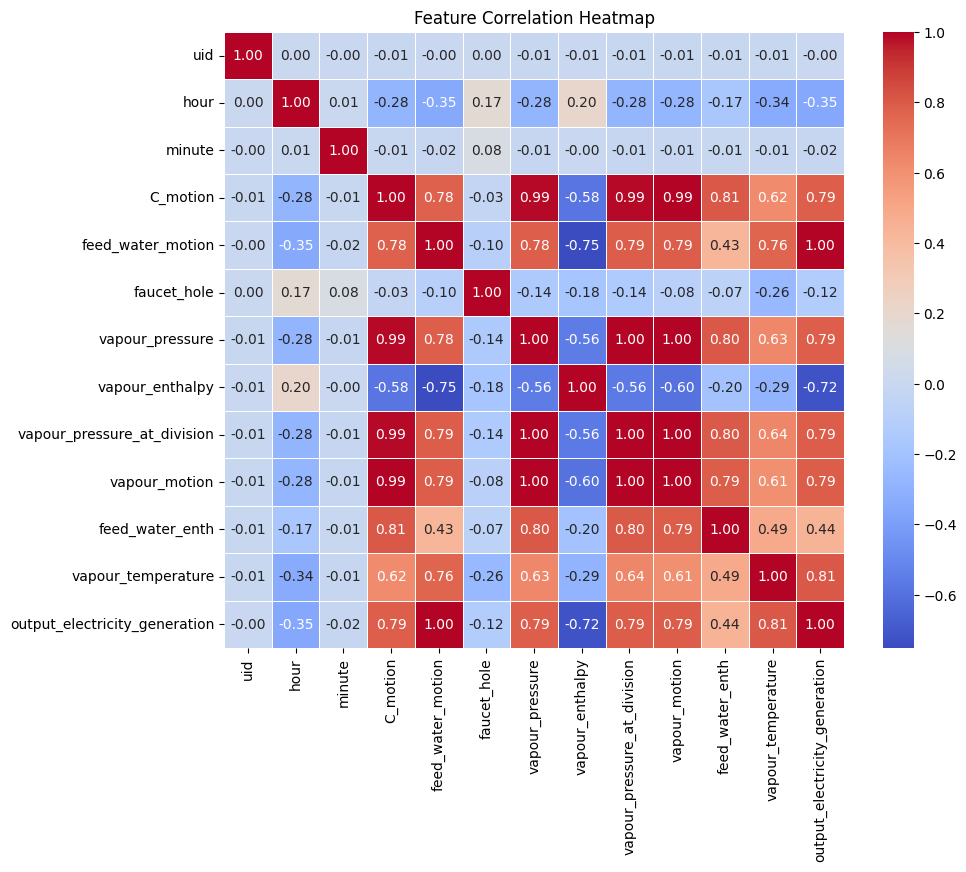

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('train.csv')

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Dropped highly correlated features: set()
Reduced dimensions: 8 components
Train RMSE: 4.0920
Test RMSE: 10.1639


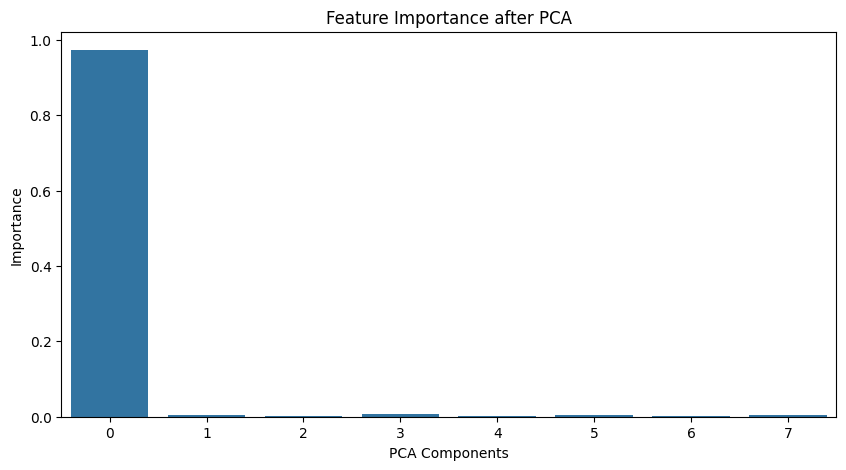

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('train.csv')

# Handle missing values (fill numerical columns with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# One-hot encoding for categorical column 'day'
df = pd.get_dummies(df, columns=['day'], drop_first=True)

# Drop UID as it's just an identifier
df.drop(['uid'], axis=1, inplace=True)

# Feature-target split
X = df.drop(['output_electricity_generation'], axis=1)
y = df['output_electricity_generation']

# Check collinearity (Correlation Matrix)
correlation_matrix = X.corr()

# Drop highly correlated features (correlation > 0.95)
high_corr_features = set()
corr_threshold = 0.95

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

X.drop(columns=high_corr_features, inplace=True)
print(f"Dropped highly correlated features: {high_corr_features}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced dimensions: {X_train_pca.shape[1]} components")

# Train Model (Random Forest)
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train_pca, y_train)

# Predict and Evaluate
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Plot Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(len(importances)), y=importances)
plt.xlabel("PCA Components")
plt.ylabel("Importance")
plt.title("Feature Importance after PCA")
plt.show()


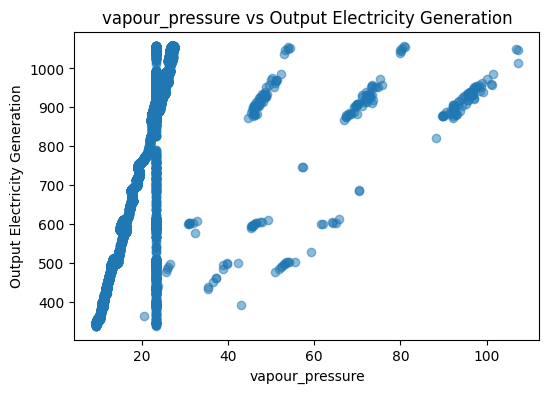

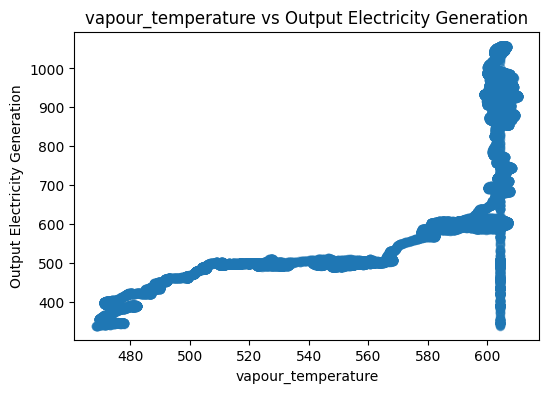

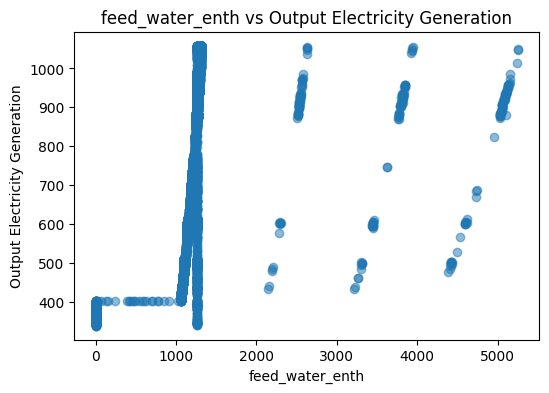

In [ ]:
import matplotlib.pyplot as plt

# Select key numerical features
features = ['vapour_pressure', 'vapour_temperature', 'feed_water_enth']  # Example features

# Plot each feature against target
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df['output_electricity_generation'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Output Electricity Generation")
    plt.title(f"{feature} vs Output Electricity Generation")
    plt.show()


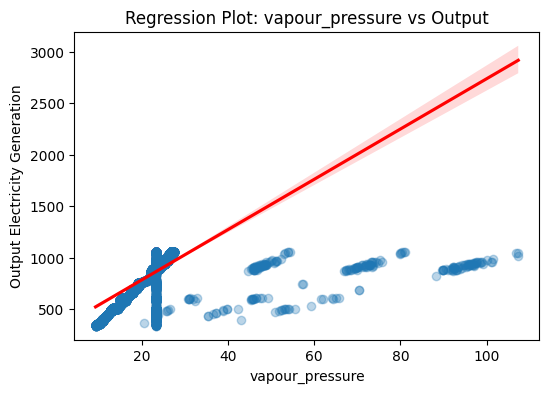

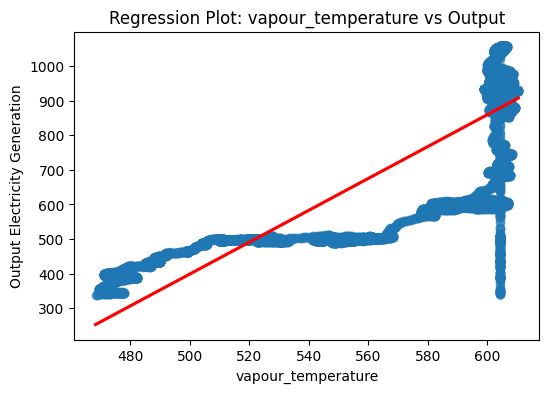

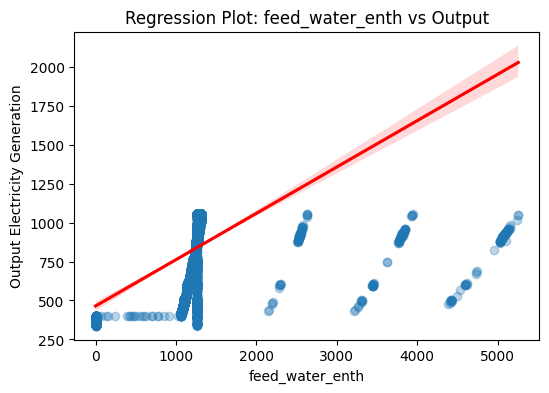

In [ ]:
import seaborn as sns

# Plot regression line for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df[feature], y=df['output_electricity_generation'], scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
    plt.xlabel(feature)
    plt.ylabel("Output Electricity Generation")
    plt.title(f"Regression Plot: {feature} vs Output")
    plt.show()


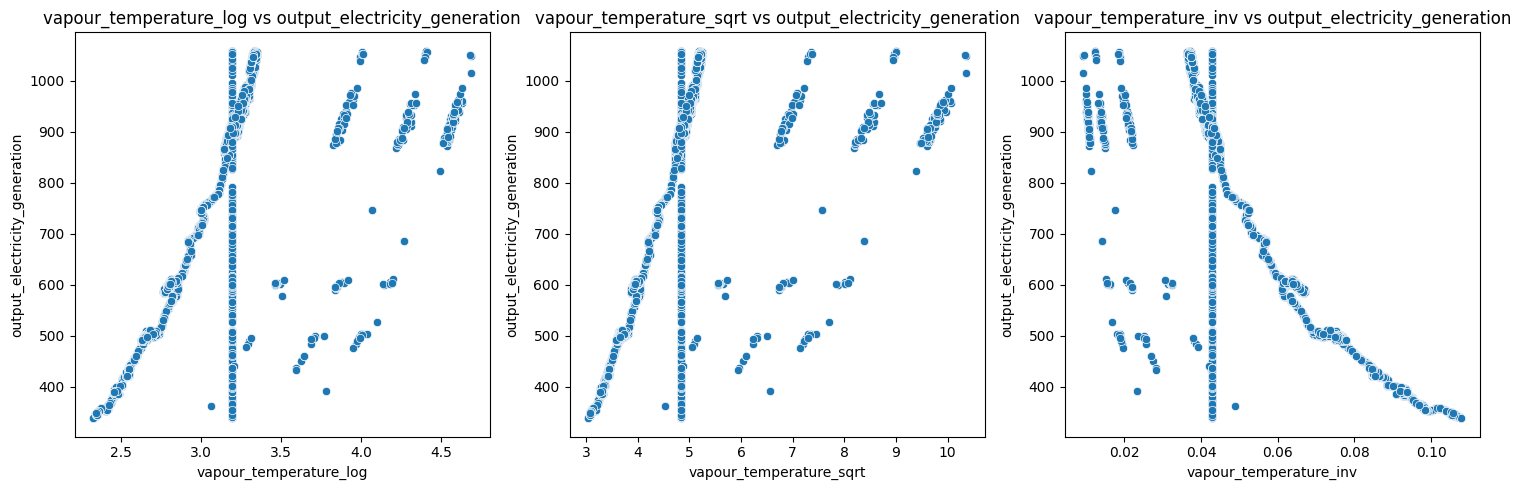

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Apply log transformation (for positively skewed data)
df['vapour_temperature_log'] = np.log1p(df['vapour_pressure'])  # log(1 + x) to avoid log(0)

# Apply square root transformation
df['vapour_temperature_sqrt'] = np.sqrt(df['vapour_pressure'])

# Apply reciprocal transformation (only if feature values are all positive)
df['vapour_temperature_inv'] = 1 / (df['vapour_pressure'] + 1e-6)  # Avoid division by zero

# Visualize the transformed feature vs. target
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['vapour_temperature_log', 'vapour_temperature_sqrt', 'vapour_temperature_inv']):
    sns.scatterplot(x=df[col], y=df['output_electricity_generation'], ax=axes[i])
    axes[i].set_title(f"{col} vs {'output_electricity_generation'}")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load data
df1 = pd.read_csv("train.csv")

# Feature 1: Boiling Point Shift Proxy
df1["boiling_point_shift"] = df1["vapour_pressure"] * 0.1  # Approximate effect on boiling point

# Feature 2: Supercritical & Ultra-Supercritical Indicator
df1["supercritical"] = ((df1["vapour_pressure"] >= 22.12) | (df1["vapour_temperature"] >= 374)).astype(int)
df1["ultra_supercritical"] = (df1["vapour_temperature"] >= 593).astype(int)

# Feature 3: Efficiency Proxy
df1["efficiency_ratio"] = df1["vapour_pressure"] / (df1["vapour_temperature"] + 1e-6)  # Avoid division by zero

# Feature 4: Interaction Features
df1["pressure_temp_interaction"] = df1["vapour_pressure"] * df1["vapour_temperature"]
df1["pressure_diff"] = df1["vapour_pressure"] - df1["feed_water_motion"]
df1["enthalpy_diff"] = df1["vapour_enthalpy"] - df1["feed_water_enth"]

# Feature 5: Time-based Features
df1["time_of_day"] = df1["hour"] + df1["minute"] / 60
df1["peak_load"] = df1["hour"].apply(lambda x: 1 if 9 <= x <= 18 else 0)  # Peak hours: 9 AM - 6 PM

# Feature 6: Control System Dynamics
df1["feedwater_turbine_sync"] = df1["feed_water_motion"] / (df1["vapour_motion"] + 1e-6)  # Avoid division by zero
df1["vapour_temp_change"] = df1["vapour_temperature"].diff().fillna(0)  # First difference (rolling effect)
df1["vapour_pressure_change"] = df1["vapour_pressure"].diff().fillna(0)

# Drop any redundant columns
df1.drop(columns=["hour", "minute"], inplace=True)

# Save enhanced dataset
df1.head()


,uid,day,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,...,ultra_supercritical,efficiency_ratio,pressure_temp_interaction,pressure_diff,enthalpy_diff,time_of_day,peak_load,feedwater_turbine_sync,vapour_temp_change,vapour_pressure_change
0,0,Saturday,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,...,1,0.041623,15076.887926,-2656.154538,1486.701784,NaN,0,0.999421,0.000000,0.000000
1,1,Saturday,238.153011,1604.213100,0.679706,15.241147,2903.619864,NaN,1602.318002,1144.454102,...,1,0.025236,9204.640402,-1588.971954,1759.165762,12.466667,1,1.001183,2.083257,-9.809746
2,2,Friday,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,NaN,1258.098883,...,1,0.038308,13903.412753,-2375.483309,1538.344701,15.216667,1,NaN,-1.490298,7.837229
3,3,Saturday,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,...,0,0.025563,8866.461743,-1604.979077,1675.559679,NaN,1,1.000399,-13.504565,-8.023394
4,4,Saturday,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,...,0,0.025710,6536.270888,-1472.708969,1716.604874,18.266667,1,0.998647,-84.729900,-2.091561


Baseline Model RMSE: 2.7927
Feature-Engineered Model RMSE: 2.9088


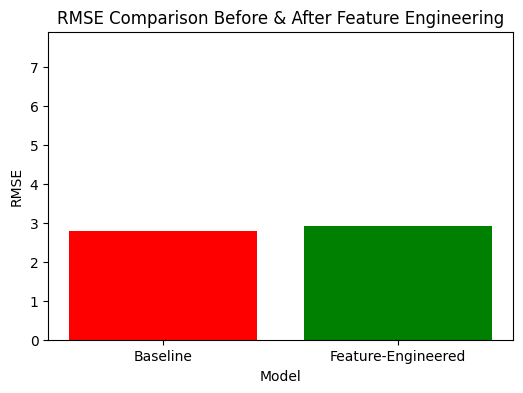

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load original dataset
df_original = pd.read_csv('train.csv')

# Load feature-engineered dataset
df_enhanced = df1
def prepare_data(df):
    """Preprocess data: handle NaNs, encode categorical features, split train-test"""
    df.fillna(df.median(numeric_only=True), inplace=True)
    df = pd.get_dummies(df, columns=["day"], drop_first=True)  # One-hot encode 'day'
    
    X = df.drop(["output_electricity_generation"], axis=1)
    y = df["output_electricity_generation"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Prepare both datasets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = prepare_data(df_original)
X_train_enh, X_test_enh, y_train_enh, y_test_enh = prepare_data(df_enhanced)

# Train Random Forest on both datasets
model_orig = RandomForestRegressor(random_state=42)
model_enh = RandomForestRegressor(random_state=42)

model_orig.fit(X_train_orig, y_train_orig)
model_enh.fit(X_train_enh, y_train_enh)

# Predict and calculate RMSE
y_pred_orig = model_orig.predict(X_test_orig)
y_pred_enh = model_enh.predict(X_test_enh)

rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
rmse_enh = np.sqrt(mean_squared_error(y_test_enh, y_pred_enh))

print(f"Baseline Model RMSE: {rmse_orig:.4f}")
print(f"Feature-Engineered Model RMSE: {rmse_enh:.4f}")

# 📊 Visualize RMSE Comparison
plt.figure(figsize=(6, 4))
plt.bar(["Baseline", "Feature-Engineered"], [rmse_orig, rmse_enh], color=["red", "green"])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison Before & After Feature Engineering")
plt.ylim(0, max(rmse_orig, rmse_enh) + 5)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("train.csv")

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# One-hot encode categorical variable 'day'
df = pd.get_dummies(df, columns=["day"], drop_first=True)

# Feature-target split
X = df.drop(["output_electricity_generation"], axis=1)
y = df["output_electricity_generation"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Neural Network Model
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.RootMeanSquaredError()])

# Train Model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network RMSE: {rmse:.4f}")




Epoch 1/100

1260/1260 [==============================] - 5s 2ms/step - loss: 117222.1094 - root_mean_squared_error: 342.3771 - val_loss: 6485.5674 - val_root_mean_squared_error: 80.5330
Epoch 2/100
1260/1260 [==============================] - 3s 2ms/step - loss: 3223.9189 - root_mean_squared_error: 56.7796 - val_loss: 2034.3635 - val_root_mean_squared_error: 45.1039
Epoch 3/100
1260/1260 [==============================] - 3s 2ms/step - loss: 1473.7443 - root_mean_squared_error: 38.3894 - val_loss: 1221.3531 - val_root_mean_squared_error: 34.9479
Epoch 4/100
1260/1260 [==============================] - 3s 2ms/step - loss: 937.0803 - root_mean_squared_error: 30.6118 - val_loss: 818.5309 - val_root_mean_squared_error: 28.6100
Epoch 5/100
1260/1260 [==============================] - 3s 2ms/step - loss: 615.1342 - root_mean_squared_error: 24.8019 - val_loss: 576.1929 - val_root_mean_squared_error: 24.0040
Epoch 6/100
1260/1260 [==============================] - 3s 2ms/step - loss: 428.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("train.csv")

# Handle missing values (fill with median)
df.fillna(df.median(numeric_only=True), inplace=True)

# One-hot encode categorical column 'day'
df = pd.get_dummies(df, columns=['day'], drop_first=True)

# Feature-target split
X = df.drop(["output_electricity_generation"], axis=1)
y = df["output_electricity_generation"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean')

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Regression RMSE: {rmse:.4f}")


KNN Regression RMSE: 10.5298


In [ ]:
# Scale target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train KNN on scaled y
knn.fit(X_train_scaled, y_train_scaled.ravel())

# Predict and inverse transform
y_pred_scaled = knn.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"KNN Regression RMSE: {rmse:.4f}")

KNN Regression RMSE: 10.5298


In [ ]:
df = pd.read_csv('train.csv')
probs = df['day'].value_counts(normalize=True)
df.loc[df['day'].isna(), 'day'] = np.random.choice(probs.index, size=df['day'].isna().sum(), p=probs.values)

for col in ['C_motion','feed_water_motion','faucet_hole','vapour_pressure','vapour_pressure_at_division','vapour_motion','feed_water_enth','vapour_temperature']:
  df[col].fillna(df[col].median(), inplace=True)
for col in ['hour','minute','vapour_enthalpy']:
  df[col].fillna(df[col].mean(), inplace=True)

df = pd.get_dummies(df, columns=['day'], drop_first=True)

from sklearn.model_selection import train_test_split

X = df.drop('output_electricity_generation', axis=1)
y = df['output_electricity_generation']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=33)

In [57]:
min_val = df['output_electricity_generation'].min()

# Get the maximum value
max_val = df['output_electricity_generation'].max()

print(f"Minimum value: {min_val}")
print(f"Maximum value: {max_val}")
print(f"Range: {min_val} to {max_val}") # Nicely formatted rang

Minimum value: 338.292910201
Maximum value: 1058.55826627
Range: 338.292910201 to 1058.55826627


In [72]:
df.head(15)

,uid,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature,output_electricity_generation,day_Saturday
0,0,7.0,29.232028,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,601.850322,974.182544,True
1,1,12.0,28.000000,238.153011,1604.213100,0.679706,15.241147,2903.619864,24.609607,1602.318002,1144.454102,603.933579,593.915516,True
2,2,15.0,13.000000,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,2464.477152,1258.098883,602.443281,884.033450,False
3,3,14.0,29.232028,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,588.938717,584.908719,True
4,4,18.0,16.000000,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,504.208816,483.609973,True
5,5,11.0,36.000000,358.275133,2616.828828,0.662797,25.076634,2784.301064,26.422585,2619.523400,1284.283978,601.479461,957.381988,False
6,6,19.0,13.000000,357.485294,2463.503461,0.658599,24.750459,2790.729226,26.061037,2568.054259,1278.173380,604.811142,937.838180,False
7,7,9.0,32.000000,350.276538,2410.736625,0.678473,22.596671,2819.454059,23.871834,2412.379941,1253.614300,607.632141,877.851813,True
8,8,2.0,51.000000,353.045869,2462.271318,0.677806,23.324601,2779.449884,24.432167,2464.477152,1264.527424,605.103460,907.734773,True
9,9,4.0,26.000000,347.780241,2461.434255,0.661185,23.596207,2807.659504,24.609607,2457.613361,1263.101562,604.764433,904.016560,True


In [74]:
X_train.shape

(40320, 13)

In [75]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Model ###
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

### XGBoost Model ###
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=300, learning_rate=0.05, max_depth=10)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

print(f'Random Forest RMSE: {rf_rmse}')
print(f'XGBoost RMSE: {xgb_rmse}')

### Hyperparameter Tuning for XGBoost ###
param_grid = {
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 300, 500]
}

grid_search = GridSearchCV(xgb.XGBRegressor(objective="reg:squarederror"), param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_xgb = grid_search.best_estimator_
best_xgb_preds = best_xgb.predict(X_test_scaled)
best_xgb_rmse = np.sqrt(mean_squared_error(y_test, best_xgb_preds))

print(f'Best XGBoost RMSE after tuning: {best_xgb_rmse}')


Random Forest RMSE: 3.2285611349515615
XGBoost RMSE: 2.982543843505226
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost RMSE after tuning: 3.9066902324745043


In [77]:
pip install optuna

DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import optuna
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'objective': 'reg:squarederror',
    }

    # Train the model with cross-validation
    model = xgb.XGBRegressor(**params)
    rmse = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    return rmse

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model using the best parameters
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final Optimized XGBoost RMSE: {final_rmse}")

c:\Users\khushi shetty\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-02-09 21:44:12,337] A new study created in memory with name: no-name-f62cc38b-41e8-4c49-a0c3-1bef6e35b6a7
  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
Best trial: 0. Best value: 4.11449:   2%|▏         | 1/50 [00:05<04:32,  5.57s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remo

[I 2025-02-09 21:44:17,916] Trial 0 finished with value: 4.1144863159588425 and parameters: {'n_estimators': 650, 'max_depth': 10, 'learning_rate': 0.07737820476595418, 'subsample': 0.9812076128204688, 'colsample_bytree': 0.7150237426095785, 'gamma': 7.871548044946092, 'reg_lambda': 5.290640637186944, 'reg_alpha': 0.5448811463285275, 'min_child_weight': 6}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:   4%|▍         | 2/50 [00:07<02:55,  3.66s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:20,253] Trial 1 finished with value: 7.661748685381779 and parameters: {'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.022789316668807263, 'subsample': 0.979516590003547, 'colsample_bytree': 0.6399126372281736, 'gamma': 9.037179653871078, 'reg_lambda': 8.399247991900785, 'reg_alpha': 5.552008451510321, 'min_child_weight': 3}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:   6%|▌         | 3/50 [00:21<06:35,  8.41s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:34,298] Trial 2 finished with value: 4.316777345278206 and parameters: {'n_estimators': 900, 'max_depth': 9, 'learning_rate': 0.014614409817930961, 'subsample': 0.8935334189628437, 'colsample_bytree': 0.8650513482359701, 'gamma': 4.6386658171162445, 'reg_lambda': 2.9879101613272296, 'reg_alpha': 1.0037037135440063, 'min_child_weight': 7}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:   8%|▊         | 4/50 [00:26<05:12,  6.80s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:38,643] Trial 3 finished with value: 4.632411040371166 and parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.019895303023665364, 'subsample': 0.7786216459029872, 'colsample_bytree': 0.5331849014329172, 'gamma': 7.526003956213753, 'reg_lambda': 4.901700265106065, 'reg_alpha': 5.923379515651396, 'min_child_weight': 10}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  10%|█         | 5/50 [00:29<04:05,  5.46s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:41,725] Trial 4 finished with value: 5.091066246930174 and parameters: {'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1082441928361764, 'subsample': 0.7516766297726752, 'colsample_bytree': 0.9381486885702688, 'gamma': 1.3818174954238471, 'reg_lambda': 6.146950484771965, 'reg_alpha': 3.672730832579142, 'min_child_weight': 9}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  12%|█▏        | 6/50 [00:41<05:34,  7.61s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:53,519] Trial 5 finished with value: 4.427343690333656 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.013975906677693486, 'subsample': 0.8547999788278786, 'colsample_bytree': 0.9317195101552085, 'gamma': 2.8103291062608915, 'reg_lambda': 4.857474159399752, 'reg_alpha': 5.396796906954141, 'min_child_weight': 2}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  14%|█▍        | 7/50 [00:45<04:37,  6.46s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:44:57,615] Trial 6 finished with value: 4.182429992029593 and parameters: {'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.16747946688623191, 'subsample': 0.7330364391309232, 'colsample_bytree': 0.5831054915673815, 'gamma': 2.9388777391756395, 'reg_lambda': 3.4062428780150764, 'reg_alpha': 0.1993581312782322, 'min_child_weight': 1}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  16%|█▌        | 8/50 [00:48<03:48,  5.44s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:00,874] Trial 7 finished with value: 10.146416294678588 and parameters: {'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.012389352610178048, 'subsample': 0.7803061308534225, 'colsample_bytree': 0.6485594728049283, 'gamma': 9.285832655636979, 'reg_lambda': 5.714671412084402, 'reg_alpha': 4.939149349395934, 'min_child_weight': 7}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  18%|█▊        | 9/50 [00:52<03:20,  4.90s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:04,582] Trial 8 finished with value: 4.653443076489499 and parameters: {'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.26027054537126315, 'subsample': 0.8401459881808757, 'colsample_bytree': 0.8192419178181779, 'gamma': 8.742413911447928, 'reg_lambda': 0.2089393840323095, 'reg_alpha': 3.5618223960548168, 'min_child_weight': 7}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  20%|██        | 10/50 [00:57<03:19,  4.99s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:09,763] Trial 9 finished with value: 4.933212579729203 and parameters: {'n_estimators': 450, 'max_depth': 7, 'learning_rate': 0.026592366219154052, 'subsample': 0.7876279196707983, 'colsample_bytree': 0.9453750443864672, 'gamma': 4.272176321104312, 'reg_lambda': 3.7145425227826925, 'reg_alpha': 7.052274484103684, 'min_child_weight': 1}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  22%|██▏       | 11/50 [01:05<03:56,  6.06s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:18,241] Trial 10 finished with value: 4.476293976418344 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05847749377912361, 'subsample': 0.5698293266432233, 'colsample_bytree': 0.735065781912015, 'gamma': 6.778803243968259, 'reg_lambda': 9.23343593976055, 'reg_alpha': 9.522657480448048, 'min_child_weight': 4}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 0. Best value: 4.11449:  24%|██▍       | 12/50 [01:09<03:27,  5.46s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:22,339] Trial 11 finished with value: 4.1450193665947355 and parameters: {'n_estimators': 150, 'max_depth': 12, 'learning_rate': 0.14095709016966135, 'subsample': 0.5874925665032026, 'colsample_bytree': 0.5183140970222833, 'gamma': 0.22466518622947262, 'reg_lambda': 1.7940434944553898, 'reg_alpha': 0.3450077905595596, 'min_child_weight': 4}. Best is trial 0 with value: 4.1144863159588425.


Best trial: 12. Best value: 4.06523:  26%|██▌       | 13/50 [01:12<02:52,  4.65s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:25,138] Trial 12 finished with value: 4.065229981144386 and parameters: {'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.06302299689045907, 'subsample': 0.5251861610994193, 'colsample_bytree': 0.7283456647161025, 'gamma': 0.5574523433319953, 'reg_lambda': 0.47247276313706443, 'reg_alpha': 1.8425470797321286, 'min_child_weight': 5}. Best is trial 12 with value: 4.065229981144386.


Best trial: 12. Best value: 4.06523:  28%|██▊       | 14/50 [01:22<03:37,  6.03s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:34,360] Trial 13 finished with value: 4.094379262785718 and parameters: {'n_estimators': 650, 'max_depth': 12, 'learning_rate': 0.05482180483118782, 'subsample': 0.6254442885934857, 'colsample_bytree': 0.7287155980107286, 'gamma': 6.409800167393543, 'reg_lambda': 7.2777371072790356, 'reg_alpha': 2.0299711502285285, 'min_child_weight': 5}. Best is trial 12 with value: 4.065229981144386.


Best trial: 12. Best value: 4.06523:  30%|███       | 15/50 [01:24<02:49,  4.85s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:36,444] Trial 14 finished with value: 6.8690337308173905 and parameters: {'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.039759826865249155, 'subsample': 0.5037443815724438, 'colsample_bytree': 0.8013159944863398, 'gamma': 6.313044687395022, 'reg_lambda': 7.3635230604475685, 'reg_alpha': 2.168330141767987, 'min_child_weight': 5}. Best is trial 12 with value: 4.065229981144386.


Best trial: 15. Best value: 3.90042:  32%|███▏      | 16/50 [01:35<03:49,  6.74s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:47,611] Trial 15 finished with value: 3.9004163716678546 and parameters: {'n_estimators': 750, 'max_depth': 11, 'learning_rate': 0.03958399054847806, 'subsample': 0.6536116431157228, 'colsample_bytree': 0.680416470002414, 'gamma': 5.217183366741147, 'reg_lambda': 7.08014154056262, 'reg_alpha': 2.204702547351739, 'min_child_weight': 5}. Best is trial 15 with value: 3.9004163716678546.


Best trial: 16. Best value: 3.69114:  34%|███▍      | 17/50 [01:44<04:12,  7.64s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:45:57,347] Trial 16 finished with value: 3.6911448202107353 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.03861401722945304, 'subsample': 0.6720321144017485, 'colsample_bytree': 0.6860409520548999, 'gamma': 2.8731774274899102, 'reg_lambda': 0.24669367432651199, 'reg_alpha': 2.7450330532897866, 'min_child_weight': 3}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  36%|███▌      | 18/50 [01:52<04:01,  7.55s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:04,676] Trial 17 finished with value: 4.323686298333712 and parameters: {'n_estimators': 850, 'max_depth': 6, 'learning_rate': 0.034449427416599364, 'subsample': 0.6686801645368908, 'colsample_bytree': 0.6600688112703461, 'gamma': 3.324416685284137, 'reg_lambda': 1.5909900604225484, 'reg_alpha': 3.3846166910765376, 'min_child_weight': 3}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  38%|███▊      | 19/50 [02:01<04:06,  7.95s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:13,565] Trial 18 finished with value: 3.9157321956722604 and parameters: {'n_estimators': 750, 'max_depth': 8, 'learning_rate': 0.037138948453623394, 'subsample': 0.6901106563029955, 'colsample_bytree': 0.5997435696416543, 'gamma': 5.320391433321374, 'reg_lambda': 7.055742133311575, 'reg_alpha': 2.7380435475006952, 'min_child_weight': 3}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  40%|████      | 20/50 [02:06<03:31,  7.05s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:18,499] Trial 19 finished with value: 5.421728173719546 and parameters: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.10218763099639315, 'subsample': 0.6584249400592386, 'colsample_bytree': 0.7908202840229066, 'gamma': 2.041977613294474, 'reg_lambda': 8.96809326428856, 'reg_alpha': 4.378808521345542, 'min_child_weight': 8}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  42%|████▏     | 21/50 [02:18<04:11,  8.68s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:30,995] Trial 20 finished with value: 3.83575452346194 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.04129028093064454, 'subsample': 0.6020719977906569, 'colsample_bytree': 0.6840290878928351, 'gamma': 3.8812295821542944, 'reg_lambda': 2.162394691226379, 'reg_alpha': 7.152995387701954, 'min_child_weight': 2}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  44%|████▍     | 22/50 [02:31<04:41, 10.04s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:44,193] Trial 21 finished with value: 3.767557740996017 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.04062564827831165, 'subsample': 0.6065071332823162, 'colsample_bytree': 0.6788653333443819, 'gamma': 4.178150213187614, 'reg_lambda': 1.4921903389145021, 'reg_alpha': 7.6415545582479165, 'min_child_weight': 2}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  46%|████▌     | 23/50 [02:44<04:54, 10.91s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:46:57,142] Trial 22 finished with value: 3.9431730466632295 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.028566094191514468, 'subsample': 0.5925095741198473, 'colsample_bytree': 0.690093910985246, 'gamma': 3.745495801242395, 'reg_lambda': 1.5458264847303642, 'reg_alpha': 7.913972793097863, 'min_child_weight': 2}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  48%|████▊     | 24/50 [02:54<04:33, 10.53s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:47:06,770] Trial 23 finished with value: 4.051989082041861 and parameters: {'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.04480020863942471, 'subsample': 0.7059541195472029, 'colsample_bytree': 0.5983607093064038, 'gamma': 2.0972590512439853, 'reg_lambda': 2.219501141675382, 'reg_alpha': 7.876926322456165, 'min_child_weight': 2}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  50%|█████     | 25/50 [03:10<05:07, 12.32s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:47:23,263] Trial 24 finished with value: 3.946750893262986 and parameters: {'n_estimators': 950, 'max_depth': 8, 'learning_rate': 0.018577533756191603, 'subsample': 0.5479560298543228, 'colsample_bytree': 0.7783862260879274, 'gamma': 4.098906613272014, 'reg_lambda': 0.6861702678727513, 'reg_alpha': 6.697799158506316, 'min_child_weight': 1}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  52%|█████▏    | 26/50 [03:19<04:31, 11.31s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:47:32,216] Trial 25 finished with value: 4.489715956509754 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.07224829077851715, 'subsample': 0.6148334259463176, 'colsample_bytree': 0.8433972059061824, 'gamma': 5.771391554978713, 'reg_lambda': 0.9549090169436936, 'reg_alpha': 9.774300665838808, 'min_child_weight': 2}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 16. Best value: 3.69114:  54%|█████▍    | 27/50 [03:31<04:20, 11.33s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:47:43,584] Trial 26 finished with value: 4.0877733493086215 and parameters: {'n_estimators': 900, 'max_depth': 7, 'learning_rate': 0.02941772976494826, 'subsample': 0.6318409429943984, 'colsample_bytree': 0.6229916116656368, 'gamma': 2.024802733803732, 'reg_lambda': 2.71664650878803, 'reg_alpha': 8.144113489171442, 'min_child_weight': 4}. Best is trial 16 with value: 3.6911448202107353.


Best trial: 27. Best value: 3.62577:  56%|█████▌    | 28/50 [03:43<04:13, 11.54s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:47:55,635] Trial 27 finished with value: 3.625772579514224 and parameters: {'n_estimators': 850, 'max_depth': 8, 'learning_rate': 0.048029967458488226, 'subsample': 0.7079648676628818, 'colsample_bytree': 0.5583000668077416, 'gamma': 3.4824697835930434, 'reg_lambda': 2.319453268619078, 'reg_alpha': 8.752026106311218, 'min_child_weight': 3}. Best is trial 27 with value: 3.625772579514224.


Best trial: 27. Best value: 3.62577:  58%|█████▊    | 29/50 [03:56<04:12, 12.01s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:48:08,731] Trial 28 finished with value: 3.7053032381829043 and parameters: {'n_estimators': 800, 'max_depth': 9, 'learning_rate': 0.08753630609026973, 'subsample': 0.7058273605378128, 'colsample_bytree': 0.5414108317237114, 'gamma': 1.43439066829808, 'reg_lambda': 4.230180868628933, 'reg_alpha': 8.878440273125564, 'min_child_weight': 3}. Best is trial 27 with value: 3.625772579514224.


Best trial: 27. Best value: 3.62577:  60%|██████    | 30/50 [04:08<03:59, 11.97s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:48:20,612] Trial 29 finished with value: 3.7679210989477476 and parameters: {'n_estimators': 650, 'max_depth': 9, 'learning_rate': 0.0898983962634095, 'subsample': 0.7300003019251295, 'colsample_bytree': 0.55268191478803, 'gamma': 1.0584807954516229, 'reg_lambda': 4.132050361792709, 'reg_alpha': 9.12605718226305, 'min_child_weight': 6}. Best is trial 27 with value: 3.625772579514224.


Best trial: 27. Best value: 3.62577:  62%|██████▏   | 31/50 [04:16<03:27, 10.93s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:48:29,126] Trial 30 finished with value: 3.982819360425836 and parameters: {'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.12859556791265397, 'subsample': 0.6932934723031441, 'colsample_bytree': 0.5052045248380077, 'gamma': 2.7673620186118826, 'reg_lambda': 4.093657897738304, 'reg_alpha': 8.701793804703128, 'min_child_weight': 3}. Best is trial 27 with value: 3.625772579514224.


Best trial: 31. Best value: 3.52007:  64%|██████▍   | 32/50 [04:29<03:26, 11.47s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:48:41,848] Trial 31 finished with value: 3.5200746717064524 and parameters: {'n_estimators': 850, 'max_depth': 9, 'learning_rate': 0.07635992119188645, 'subsample': 0.7077066988949048, 'colsample_bytree': 0.5608881524668055, 'gamma': 1.777294830518104, 'reg_lambda': 1.1781976080605445, 'reg_alpha': 8.59212361673602, 'min_child_weight': 4}. Best is trial 31 with value: 3.5200746717064524.


Best trial: 31. Best value: 3.52007:  66%|██████▌   | 33/50 [04:41<03:17, 11.64s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:48:53,861] Trial 32 finished with value: 3.639261730156241 and parameters: {'n_estimators': 850, 'max_depth': 9, 'learning_rate': 0.08614163104429375, 'subsample': 0.8196564094688783, 'colsample_bytree': 0.5617490296753977, 'gamma': 1.1756070835581576, 'reg_lambda': 0.8450596871041323, 'reg_alpha': 8.651980383119561, 'min_child_weight': 4}. Best is trial 31 with value: 3.5200746717064524.


Best trial: 31. Best value: 3.52007:  68%|██████▊   | 34/50 [04:53<03:09, 11.86s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:49:06,240] Trial 33 finished with value: 3.527388323794817 and parameters: {'n_estimators': 850, 'max_depth': 9, 'learning_rate': 0.05365503276285007, 'subsample': 0.9483316856601008, 'colsample_bytree': 0.5727590259150572, 'gamma': 0.825775575830597, 'reg_lambda': 0.057084190059180445, 'reg_alpha': 6.266016433705757, 'min_child_weight': 4}. Best is trial 31 with value: 3.5200746717064524.


Best trial: 34. Best value: 3.51934:  70%|███████   | 35/50 [05:05<02:55, 11.68s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:49:17,505] Trial 34 finished with value: 3.519335374309258 and parameters: {'n_estimators': 850, 'max_depth': 11, 'learning_rate': 0.06624197182063235, 'subsample': 0.9889615432025881, 'colsample_bytree': 0.5658790044337348, 'gamma': 0.6988613559247105, 'reg_lambda': 1.0311271232432526, 'reg_alpha': 9.975330925612647, 'min_child_weight': 4}. Best is trial 34 with value: 3.519335374309258.


Best trial: 34. Best value: 3.51934:  72%|███████▏  | 36/50 [05:23<03:09, 13.55s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:49:35,424] Trial 35 finished with value: 3.631934278159604 and parameters: {'n_estimators': 850, 'max_depth': 11, 'learning_rate': 0.06772059714716129, 'subsample': 0.9883331315709286, 'colsample_bytree': 0.6192232641821702, 'gamma': 0.11856503890120074, 'reg_lambda': 2.75774223879159, 'reg_alpha': 6.05462000454166, 'min_child_weight': 6}. Best is trial 34 with value: 3.519335374309258.


Best trial: 36. Best value: 3.48262:  74%|███████▍  | 37/50 [05:36<02:55, 13.53s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:49:48,901] Trial 36 finished with value: 3.4826240274829745 and parameters: {'n_estimators': 550, 'max_depth': 11, 'learning_rate': 0.04699769922317872, 'subsample': 0.9412264953049596, 'colsample_bytree': 0.5534008513485991, 'gamma': 0.6423632177880956, 'reg_lambda': 0.014386213553571947, 'reg_alpha': 9.820494850783268, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  76%|███████▌  | 38/50 [05:50<02:42, 13.53s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:02,442] Trial 37 finished with value: 3.5085301790309877 and parameters: {'n_estimators': 500, 'max_depth': 11, 'learning_rate': 0.05211131479245917, 'subsample': 0.9399788180755542, 'colsample_bytree': 0.5766087521450847, 'gamma': 0.6588111887775683, 'reg_lambda': 1.070670029979731, 'reg_alpha': 9.921554506124394, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  78%|███████▊  | 39/50 [05:59<02:15, 12.34s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:11,991] Trial 38 finished with value: 3.7349387178679345 and parameters: {'n_estimators': 500, 'max_depth': 11, 'learning_rate': 0.07217601812963868, 'subsample': 0.9445638784307177, 'colsample_bytree': 0.5002050742325447, 'gamma': 1.7289239680054114, 'reg_lambda': 1.2197836530632866, 'reg_alpha': 9.933714780532835, 'min_child_weight': 5}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  80%|████████  | 40/50 [06:07<01:51, 11.10s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:20,204] Trial 39 finished with value: 5.4441741240167705 and parameters: {'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.01011095654198274, 'subsample': 0.8954927234036713, 'colsample_bytree': 0.5325766185705112, 'gamma': 0.6616380679325714, 'reg_lambda': 0.8634168592675574, 'reg_alpha': 9.438642896141394, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  82%|████████▏ | 41/50 [06:20<01:44, 11.63s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:33,085] Trial 40 finished with value: 3.9098398928554787 and parameters: {'n_estimators': 550, 'max_depth': 11, 'learning_rate': 0.021111941326335138, 'subsample': 0.9040789557453112, 'colsample_bytree': 0.5906397715618041, 'gamma': 0.23248159506071642, 'reg_lambda': 3.3282582883646836, 'reg_alpha': 9.984750144162772, 'min_child_weight': 10}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  84%|████████▍ | 42/50 [06:28<01:24, 10.59s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:41,250] Trial 41 finished with value: 3.5482256000291974 and parameters: {'n_estimators': 550, 'max_depth': 10, 'learning_rate': 0.053515354654269556, 'subsample': 0.9456975990348153, 'colsample_bytree': 0.5714636791534417, 'gamma': 0.7996905786870341, 'reg_lambda': 0.10953576966937906, 'reg_alpha': 9.266799398978577, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  86%|████████▌ | 43/50 [06:35<01:05,  9.43s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:47,951] Trial 42 finished with value: 3.5482266743966306 and parameters: {'n_estimators': 350, 'max_depth': 11, 'learning_rate': 0.05053222319025209, 'subsample': 0.9516692797845818, 'colsample_bytree': 0.626148598217883, 'gamma': 1.4250893172827643, 'reg_lambda': 0.18033409351132657, 'reg_alpha': 8.527679950834706, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  88%|████████▊ | 44/50 [06:41<00:50,  8.34s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:50:53,736] Trial 43 finished with value: 3.6744079554321063 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.061207745540014555, 'subsample': 0.9995647837223877, 'colsample_bytree': 0.5238014996050123, 'gamma': 2.4938624795774946, 'reg_lambda': 1.22387507428484, 'reg_alpha': 9.35610955904309, 'min_child_weight': 6}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  90%|█████████ | 45/50 [06:47<00:38,  7.77s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:51:00,204] Trial 44 finished with value: 4.287733394687011 and parameters: {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.11115347336140942, 'subsample': 0.9148229824492972, 'colsample_bytree': 0.9844140520937852, 'gamma': 0.7183902947758201, 'reg_lambda': 0.062042218714645214, 'reg_alpha': 8.258342590586793, 'min_child_weight': 5}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  92%|█████████▏| 46/50 [07:00<00:36,  9.20s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:51:12,749] Trial 45 finished with value: 3.9327038431667263 and parameters: {'n_estimators': 650, 'max_depth': 11, 'learning_rate': 0.21627511921575213, 'subsample': 0.8679684423173877, 'colsample_bytree': 0.5880588082799831, 'gamma': 0.0531386307685745, 'reg_lambda': 1.9097114128740698, 'reg_alpha': 6.319686155646956, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  94%|█████████▍| 47/50 [07:06<00:24,  8.24s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:51:18,752] Trial 46 finished with value: 3.7230255093513143 and parameters: {'n_estimators': 550, 'max_depth': 10, 'learning_rate': 0.07882535510956944, 'subsample': 0.9643427799690106, 'colsample_bytree': 0.6396896245071165, 'gamma': 1.637518106030552, 'reg_lambda': 0.6289255959864876, 'reg_alpha': 7.400410308179967, 'min_child_weight': 5}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  96%|█████████▌| 48/50 [07:20<00:19,  9.89s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:51:32,468] Trial 47 finished with value: 3.874277114182256 and parameters: {'n_estimators': 700, 'max_depth': 12, 'learning_rate': 0.03196787713491519, 'subsample': 0.9283577703037503, 'colsample_bytree': 0.5456969337157113, 'gamma': 0.9486398533825905, 'reg_lambda': 9.996155058792326, 'reg_alpha': 5.094858907179637, 'min_child_weight': 4}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262:  98%|█████████▊| 49/50 [07:27<00:09,  9.25s/it]C:\Users\khushi shetty\AppData\Local\Temp\ipykernel_38040\4220568486.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),


[I 2025-02-09 21:51:40,242] Trial 48 finished with value: 3.556632132373109 and parameters: {'n_estimators': 450, 'max_depth': 9, 'learning_rate': 0.05537173696340247, 'subsample': 0.9704394077318368, 'colsample_bytree': 0.5738192259799004, 'gamma': 0.46886732269832015, 'reg_lambda': 1.2176248141808235, 'reg_alpha': 9.609982117984853, 'min_child_weight': 3}. Best is trial 36 with value: 3.4826240274829745.


Best trial: 36. Best value: 3.48262: 100%|██████████| 50/50 [07:34<00:00,  9.08s/it]


[I 2025-02-09 21:51:46,546] Trial 49 finished with value: 3.7754138914731343 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.10093034616804313, 'subsample': 0.8759683930786061, 'colsample_bytree': 0.6116725697516049, 'gamma': 2.290806093408208, 'reg_lambda': 0.5177565562953875, 'reg_alpha': 9.044244342021663, 'min_child_weight': 7}. Best is trial 36 with value: 3.4826240274829745.
Best Parameters: {'n_estimators': 550, 'max_depth': 11, 'learning_rate': 0.04699769922317872, 'subsample': 0.9412264953049596, 'colsample_bytree': 0.5534008513485991, 'gamma': 0.6423632177880956, 'reg_lambda': 0.014386213553571947, 'reg_alpha': 9.820494850783268, 'min_child_weight': 4}
Final Optimized XGBoost RMSE: 3.300642488815437


In [79]:
df1

,uid,day,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,...,ultra_supercritical,efficiency_ratio,pressure_temp_interaction,pressure_diff,enthalpy_diff,time_of_day,peak_load,feedwater_turbine_sync,vapour_temp_change,vapour_pressure_change
0,0,Saturday,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,...,1,0.041623,15076.887926,-2656.154538,1486.701784,12.533333,0,0.999421,0.000000,0.000000
1,1,Saturday,238.153011,1604.213100,0.679706,15.241147,2903.619864,24.609607,1602.318002,1144.454102,...,1,0.025236,9204.640402,-1588.971954,1759.165762,12.466667,1,1.001183,2.083257,-9.809746
2,2,Friday,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,2464.477152,1258.098883,...,1,0.038308,13903.412753,-2375.483309,1538.344701,15.216667,1,0.999996,-1.490298,7.837229
3,3,Saturday,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,...,0,0.025563,8866.461743,-1604.979077,1675.559679,12.533333,1,1.000399,-13.504565,-8.023394
4,4,Saturday,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,...,0,0.025710,6536.270888,-1472.708969,1716.604874,18.266667,1,0.998647,-84.729900,-2.091561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,50395,Saturday,358.326096,2466.188446,0.679246,23.079785,2795.566204,24.382871,2463.927286,1263.867952,...,0,0.038574,14101.611353,-2443.108661,1531.698251,3.883333,0,1.000918,0.000000,-1.285769
50396,50396,Saturday,205.657731,1520.898592,0.683778,13.324238,2833.890795,14.059122,2464.477152,1107.134960,...,0,0.026307,6748.557682,-1507.574354,1726.755835,18.100000,1,0.999996,0.000000,-9.755547
50397,50397,Friday,356.572958,2432.402583,0.678961,22.805262,2784.953650,24.089748,2464.477152,1258.890934,...,0,0.038574,14101.611353,-2409.597321,1526.062716,12.533333,0,0.999996,0.000000,9.481025
50398,50398,Friday,344.533133,2447.181803,0.661900,23.493103,2803.209426,24.609607,2445.952298,1264.949843,...,1,0.038948,14170.800772,-2423.688700,1538.259583,17.383333,1,1.000503,0.000000,0.687840


In [91]:
from sklearn.preprocessing import LabelEncoder
df1['obs_day'] = LabelEncoder().fit_transform(df1['day'])

In [92]:
df1

,uid,day,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,...,efficiency_ratio,pressure_temp_interaction,pressure_diff,enthalpy_diff,time_of_day,peak_load,feedwater_turbine_sync,vapour_temp_change,vapour_pressure_change,obs_day
0,0,Saturday,387.374315,2681.205431,0.678352,25.050893,2775.784134,26.465138,2682.758692,1289.082351,...,0.041623,15076.887926,-2656.154538,1486.701784,12.533333,0,0.999421,0.000000,0.000000,1
1,1,Saturday,238.153011,1604.213100,0.679706,15.241147,2903.619864,24.609607,1602.318002,1144.454102,...,0.025236,9204.640402,-1588.971954,1759.165762,12.466667,1,1.001183,2.083257,-9.809746,1
2,2,Friday,338.270228,2398.561685,0.662971,23.078376,2796.443584,24.316160,2464.477152,1258.098883,...,0.038308,13903.412753,-2375.483309,1538.344701,15.216667,1,0.999996,-1.490298,7.837229,0
3,3,Saturday,254.294492,1620.034059,0.679977,15.054982,2818.023511,15.895513,1619.387667,1142.463833,...,0.025563,8866.461743,-1604.979077,1675.559679,12.533333,1,1.000399,-13.504565,-8.023394,1
4,4,Saturday,203.189410,1485.672389,0.686342,12.963420,2816.144355,13.682371,1487.685052,1099.539481,...,0.025710,6536.270888,-1472.708969,1716.604874,18.266667,1,0.998647,-84.729900,-2.091561,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,50395,Saturday,358.326096,2466.188446,0.679246,23.079785,2795.566204,24.382871,2463.927286,1263.867952,...,0.038574,14101.611353,-2443.108661,1531.698251,3.883333,0,1.000918,0.000000,-1.285769,1
50396,50396,Saturday,205.657731,1520.898592,0.683778,13.324238,2833.890795,14.059122,2464.477152,1107.134960,...,0.026307,6748.557682,-1507.574354,1726.755835,18.100000,1,0.999996,0.000000,-9.755547,1
50397,50397,Friday,356.572958,2432.402583,0.678961,22.805262,2784.953650,24.089748,2464.477152,1258.890934,...,0.038574,14101.611353,-2409.597321,1526.062716,12.533333,0,0.999996,0.000000,9.481025,0
50398,50398,Friday,344.533133,2447.181803,0.661900,23.493103,2803.209426,24.609607,2445.952298,1264.949843,...,0.038948,14170.800772,-2423.688700,1538.259583,17.383333,1,1.000503,0.000000,0.687840,0


In [93]:
df1['obs_day'].unique()

array([1, 0, 2])

In [95]:
df = pd.read_csv('train.csv')

In [96]:
test = pd.read_csv('test.csv')

In [101]:
df = pd.get_dummies(df,columns=['day'], drop_first=True)
test = pd.get_dummies(test,columns=['day'], drop_first=True)

In [102]:
def replace_median(train_df,features):
    train_df=train_df.fillna(0) 
    for f in features:
        train_df[f]=train_df[f].replace(0,train_df[f].mean())
    return train_df

In [105]:
df.columns

Index(['uid', 'hour', 'minute', 'C_motion', 'feed_water_motion', 'faucet_hole',
       'vapour_pressure', 'vapour_enthalpy', 'vapour_pressure_at_division',
       'vapour_motion', 'feed_water_enth', 'vapour_temperature',
       'output_electricity_generation', 'day_Saturday'],
      dtype='object')

In [106]:
df.fillna(0, inplace=True)
# Replace 0s in feature columns with the mean of that column
for col in df.columns:
    if col not in ['output_electricity_generation', 'uid']:  # Exclude target and ID columns
        df[col] = df[col].replace(0, df[col].median())

In [107]:
df.isna().sum()

uid                              0
hour                             0
minute                           0
C_motion                         0
feed_water_motion                0
faucet_hole                      0
vapour_pressure                  0
vapour_enthalpy                  0
vapour_pressure_at_division      0
vapour_motion                    0
feed_water_enth                  0
vapour_temperature               0
output_electricity_generation    0
day_Saturday                     0
dtype: int64

In [108]:
feature_names

['uid',
 'hour',
 'minute',
 'C_motion',
 'feed_water_motion',
 'faucet_hole',
 'vapour_pressure',
 'vapour_enthalpy',
 'vapour_pressure_at_division',
 'vapour_motion',
 'feed_water_enth',
 'vapour_temperature',
 'day_Saturday']

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[feature_names] = scaler.fit_transform(df[feature_names])
test[feature_names] = scaler.transform(test[feature_names])

In [110]:
X = df.drop('output_electricity_generation', axis=1)
y = df['output_electricity_generation']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [111]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")


Random Forest RMSE: 4.726388415889951


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Define Random Forest parameters
rf_params = {
    'n_estimators': 500,      # Number of trees in the forest
    'max_depth': 10,          # Maximum depth of the trees
    'min_samples_split': 5,   # Minimum samples to split a node
    'min_samples_leaf': 2,    # Minimum samples in a leaf
    'max_features': 'sqrt',   # Number of features per split
    'random_state': 2023,     # Ensuring reproducibility
    'n_jobs': -1              # Use all available CPU cores
}

# Initialize model
rf_model = RandomForestRegressor(**rf_params)

# List to store trained models
saved_models = []

# KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=2022)

for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold num: {fold_id}')
    
    # Train model
    rf_model.fit(X_train, y_train)



Fold num: 0
Fold num: 1
Fold num: 2
Fold num: 3
Fold num: 4


In [113]:
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")


Random Forest RMSE: 5.114540458046394


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


# # Load the train data
# df = pd.read_csv('train.csv')

# # Handle missing values (fill numerical columns with median) 
# df.fillna(df.median(numeric_only=True), inplace=True)
# # One-hot encoding for categorical column 'day'
# df =pd.get_dummies(df, columns=['day'], drop_first=True)
# # Feature-target split
# X = df.drop(['output_electricity_generation'], axis=1)
# y= df['output_electricity_generation']
      

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
# scaler= StandardScaler()
scaler= RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Base Random Forest Model
model=RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 1.5182
Test RMSE: 2.7484


In [131]:
test = pd.read_csv('test.csv')

In [132]:
test

,uid,day,hour,minute,C_motion,feed_water_motion,faucet_hole,vapour_pressure,vapour_enthalpy,vapour_pressure_at_division,vapour_motion,feed_water_enth,vapour_temperature
0,0,Friday,23.0,9.0,362.889183,2538.476156,0.678994,23.691700,2756.917646,25.027375,2536.898622,1273.011364,NaN
1,1,Friday,11.0,37.0,360.137575,2612.432523,0.666045,NaN,2783.082086,26.221884,2610.644658,1283.705519,601.759841
2,2,Friday,18.0,34.0,358.571643,2519.399650,0.674544,23.735582,2786.990749,25.051226,2519.766762,NaN,603.899236
3,3,NaN,12.0,26.0,NaN,2433.170459,NaN,23.443632,2821.222288,24.677265,2432.567588,1261.064125,603.034283
4,4,Friday,20.0,40.0,NaN,NaN,0.679031,23.308474,2796.995037,24.617265,2485.478112,1268.990134,605.222529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,21595,Friday,21.0,22.0,350.547735,NaN,0.677179,NaN,2792.440155,24.436078,2451.605650,1267.202949,603.417754
21596,21596,Friday,14.0,58.0,349.244673,2398.258155,0.678886,22.531962,2791.812055,23.801528,2400.723520,1256.612046,605.503277
21597,21597,Friday,23.0,5.0,357.152573,2525.896278,0.676416,23.761867,2766.226004,25.088997,NaN,1273.398714,604.848670
21598,21598,Saturday,0.0,53.0,359.203691,2490.426378,0.655879,24.169350,2754.626858,25.411994,2489.651716,1272.959188,605.145455


In [133]:
test.loc[test['day'].isna(), 'day'] = np.random.choice(probs.index, size=test['day'].isna().sum(), p=probs.values)

for col in ['C_motion','feed_water_motion','faucet_hole','vapour_pressure','vapour_pressure_at_division','vapour_motion','feed_water_enth','vapour_temperature']:
  test[col].fillna(df[col].median(), inplace=True)
for col in ['hour','minute','vapour_enthalpy']:
  test[col].fillna(df[col].mean(), inplace=True)

test = pd.get_dummies(test, columns=['day'], drop_first=True)


test_scaled = scaler.transform(test)
# Predict using the trained model
test_predictions_scaled = model.predict(test_scaled)
# Since we only scaled X and not y, no need to inverse transform y
submission = pd.DataFrame({'uid': test_uid, 'output_electricity_generation': test_predictions_scaled})
# Save predictions
submission.to_csv('submission_rf_robust.csv', index=False)

In [134]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost parameters for tuning
xgb_params = {
    'n_estimators': [300, 500, 800, 1000],
    'learning_rate': [0.01, 0.03, 0.1],
    'max_depth': [4, 6, 8, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=2023)

# Randomized Search Cross Validation
random_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model from search
best_xgb = random_search.best_estimator_

# Predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Best XGBoost Train RMSE: {train_rmse:.4f}")
print(f"Best XGBoost Test RMSE: {test_rmse:.4f}")


Best XGBoost Train RMSE: 0.4272
Best XGBoost Test RMSE: 3.4713


In [135]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=8,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=2023
)

# Train LightGBM
lgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

# RMSE Calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"LightGBM Train RMSE: {train_rmse:.4f}")
print(f"LightGBM Test RMSE: {test_rmse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2638
[LightGBM] [Info] Number of data points in the train set: 40320, number of used features: 13
[LightGBM] [Info] Start training from score 832.300201
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [138]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# New XGBoost hyperparameters
xgb_params = {
    'n_estimators': 2000, 
    'learning_rate': 0.01,  
    'max_depth': 5,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'gamma': 0.4,  
    'reg_lambda': 5,  
    'reg_alpha': 0.5,  
    'min_child_weight': 10,  
    'random_state': 2023
}

# Train XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
              early_stopping_rounds=100, verbose=100)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Updated XGBoost Train RMSE: {train_rmse:.4f}")
print(f"Updated XGBoost Test RMSE: {test_rmse:.4f}")


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [137]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\khushi shetty\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [139]:
from xgboost import XGBRegressor, DMatrix
from sklearn.metrics import mean_squared_error
import numpy as np

# New XGBoost parameters
xgb_params = {
    'n_estimators': 2000, 
    'learning_rate': 0.01,  
    'max_depth': 5,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'gamma': 0.4,  
    'reg_lambda': 5,  
    'reg_alpha': 0.5,  
    'min_child_weight': 10,  
    'random_state': 2023
}

# Convert to DMatrix
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Train model using XGBoost's native API
xgb_model = XGBRegressor(objective='reg:squarederror', **xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], 
              eval_metric='rmse', verbose=100, early_stopping_rounds=100)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Updated XGBoost Train RMSE: {train_rmse:.4f}")
print(f"Updated XGBoost Test RMSE: {test_rmse:.4f}")


TypeError: XGBModel.fit() got an unexpected keyword argument 'eval_metric'

In [140]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Updated XGBoost parameters
xgb_params = {
    'n_estimators': 2000, 
    'learning_rate': 0.01,  
    'max_depth': 5,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'gamma': 0.4,  
    'reg_lambda': 5,  
    'reg_alpha': 0.5,  
    'min_child_weight': 10,  
    'random_state': 2023,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  # ✅ Moved inside model parameters
}

# Train model
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100, early_stopping_rounds=100)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Updated XGBoost Train RMSE: {train_rmse:.4f}")
print(f"Updated XGBoost Test RMSE: {test_rmse:.4f}")


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define XGBoost parameters
xgb_params = {
    'n_estimators': 2000,  # Large value, we'll stop early manually
    'learning_rate': 0.01,  
    'max_depth': 5,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'gamma': 0.4,  
    'reg_lambda': 5,  
    'reg_alpha': 0.5,  
    'min_child_weight': 10,  
    'random_state': 2023,
    'objective': 'reg:squarederror'
}

# Train model
xgb_model = XGBRegressor(**xgb_params)

# Initialize variables for manual early stopping
best_rmse = float("inf")
best_iteration = 0
patience = 100  # Number of rounds to wait before stopping
wait = 0

# Training loop
for n in range(1, xgb_params['n_estimators'] + 1):
    xgb_model.n_estimators = n  # Update number of estimators
    xgb_model.fit(X_train, y_train)  # Train with updated number of trees
    
    # Predictions on validation set
    y_test_pred = xgb_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Check for improvement
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_iteration = n
        wait = 0  # Reset wait counter
    else:
        wait += 1
    
    # Stop if no improvement for 'patience' rounds
    if wait >= patience:
        print(f"Early stopping at iteration {best_iteration} with RMSE: {best_rmse:.4f}")
        break

# Final predictions using best iteration
xgb_model.n_estimators = best_iteration
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Final RMSE calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Final XGBoost Train RMSE: {train_rmse:.4f}")
print(f"Final XGBoost Test RMSE: {test_rmse:.4f}")


In [ ]:
# Predict using the trained model
test_predictions_scaled = xgb_model.predict(test_scaled)
# Since we only scaled X and not y, no need to inverse transform y
submission = pd.DataFrame({'uid': test_uid, 'output_electricity_generation': test_predictions_scaled})
# Save predictions
submission.to_csv('submission_xgb.csv', index=False)